In [30]:
import os
import sys
import argparse
import numpy as np
import time
from sklearn.cluster import KMeans
import libs.features as lf

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import networkx as nx ### This is the graphing library he used
from IPython.display import clear_output

%matplotlib inline

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
csvFile ='data/WordFluencyMultiTest.csv'
RawTestData = lf.read_data_from_file(csvFile)

In [11]:
FluencyTestData = lf.aggregate_fluency_tests(RawTestData)
patients = lf.word_graph(FluencyTestData)

In [31]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-3.0, 3.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [85]:
m = patients[2]
a = m.graph

nx.draw_networkx(m.graph)
plt.clf()

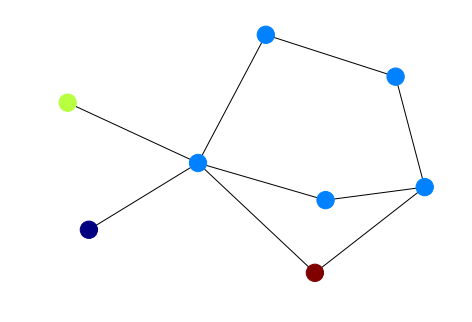

In [32]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
#nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()


In [97]:
def f(x):
    #clear_output(wait=True)
    nx.draw_networkx(patients[x].graph)
    plt.show()
    print( patients[x].words)
    return

In [96]:
interact(f, x=widgets.IntSlider(min=1, max=20, step=1, value=10))

<function __main__.f>

In [98]:
default_features = ["node_count", "edge_count", "cycle_count", "error_count", "diameter", "longest_cycle"]

2


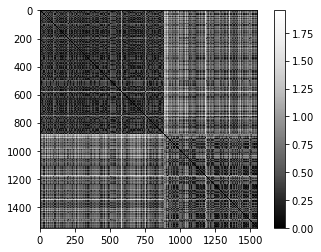

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
3


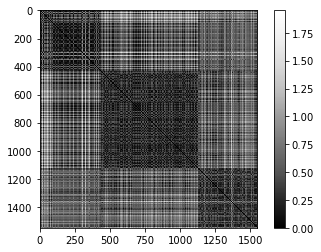

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
4


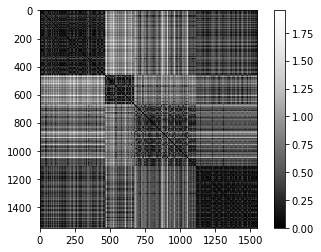

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
5


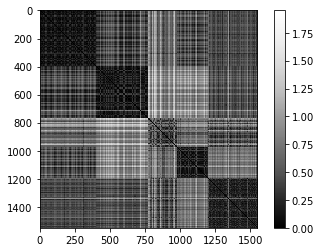

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
6


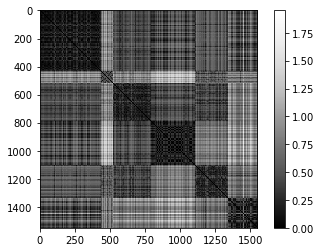

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
7


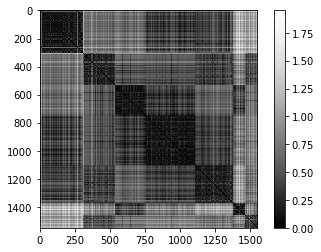

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [131]:
from scipy.spatial.distance import pdist, squareform

patients, features, X = lf.build_feature_matrix(patients, default_features)
## KMeans iterations
for x in range(2,8):
    print(x), "for Kmeans"
    km = KMeans(x)    
    clustering = km.fit(X)
    centers = clustering.cluster_centers_
    labels = list(set(km.labels_))
    #print(centers)
    index = np.empty(shape=(0,0))
    cluster_labels = km.labels_
    
    labels = list(set(cluster_labels))

    for label in labels:
            idx = np.where(cluster_labels == label)[0]
            index = np.append(index, idx)

    D = squareform(pdist(X, 'euclidean'))
    index = index.astype(int)
    reordered_d = D[index,:][:,index]
    plt.imshow(reordered_d, cmap='Greys_r')
    plt.colorbar()
    plt.show()

    print(clustering)
    

In [ ]:
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));
